In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time
import math
import numpy as np
import pylab as py
import time
import random
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
#inverse of a 2X2 matrix
def a_inv(A): # A is a  2X2 matrix with non zero determinant
    a=A[0][0]
    b=A[0][1]
    c=A[1][0]
    d=A[1][1]
    det=a*d-b*c
    #now inverse
    B= np.zeros((2,2))
    B[0][0]=d/det
    B[0][1]=-b/det
    B[1][0]=-c/det
    B[1][1]=a/det
    return B

In [3]:
###Getting DE for for both variables
# [x1 x2]>>>>>X for theta1
# x1 >>>>theta1 and x2 >>>> theta1 dot
# [y1 y2]>>>>>Y for theta2
# y1 >>>>theta2 and y2 >>>> theta2 dot


def theta_double_dot(X,Y):
    theta1,theta1_dot=X
    theta2,theta2_dot=Y
    #A.Theta_double dot= B
    ###A
    A=np.zeros((2,2))
    A[0,0]=(m1+m2)*l1
    A[1,0]=m2*l1*np.cos(theta1-theta2)
    A[0,1]=m2*l2*np.cos(theta1-theta2)
    A[1,1]=m2*l2
    ##inverse of A
    Ai=a_inv(A)
    # Column vector B
    B=np.zeros(2)
    B[0]=-(g*(m1+m2)*np.sin(theta1)+m2*l2*(theta2_dot**2)*np.sin(theta1-theta2))
    B[1]=(m2*l1*(theta1_dot**2)*np.sin(theta1-theta2)-m2*g*np.sin(theta2))
    #### Now Ai.B
    #Theta_double_dot=[Theta1_double_dot,Theta2_double_dot]
    Theta_double_dot=np.dot(Ai,B)
    return Theta_double_dot

In [8]:
def F(theta_double_dot,X,Y):
    theta1_dot=X[1]
    theta2_dot=Y[1]
    omega1_dot,omega2_dot=theta_double_dot(X,Y)
    f=np.array([[theta1_dot,omega1_dot],[theta2_dot,omega2_dot]])
    return f

In [9]:
# X_0 is a column vector if initial values  X_0=[theta1,theta1_dot]^T
# Y_0 is a column vector if initial values  Y_0=[theta2,theta2_dot]^T
def rk_4(X_0,Y_0,a,b,h,theta_double_dot,F): 
    M=int((b-a)/h)
    t=np.linspace(a,b,M+1)
    X=X_0
    Y=Y_0
    for j in range(M):
        x=np.array([X[0][-1],X[1][-1]])
        y=np.array([Y[0][-1],Y[1][-1]])
        #print('x is : ',x)
        #print('y is : ',y)
        F1=h*F(theta_double_dot,x,y)
        #print(F1)
        F2=h*F(theta_double_dot,x+F1[0]/2,y+F1[1]/2)
        F3=h*F(theta_double_dot,x+F2[0]/2,y+F2[1]/2)
        F4=h*F(theta_double_dot,x+F3[0],y+F3[1])
        X[0].append(X[0][-1]+((F1+F2+F3+F4)[0][0])/6)
        X[1].append(X[1][-1]+((F1+F2+F3+F4)[0][1])/6)
        Y[0].append(Y[0][-1]+((F1+F2+F3+F4)[1][0])/6)
        Y[1].append(Y[1][-1]+((F1+F2+F3+F4)[1][1])/6)
    return np.array(t),np.array(X[0]),np.array(Y[0]),np.array(X[1]),np.array(Y[1])
##Returns time,theta1,theta2,omega_1,omega_2

In [10]:
# let's convert angle in degrees to radian
def deg_to_rad(angle_deg):
    angle_rad=angle_deg*np.pi/180
    return angle_rad 

In [11]:
#define constants:
m1=2 # mass of first pendulum
m2=1 # mass of second pendulum
l1=1.4 # lenghth of first pendulum
l2=1 # length of second pendulum
g=9.8 # gravitational constant

# giving nearly similar initial conditions
u0 = [deg_to_rad(100), deg_to_rad(5), deg_to_rad(148), deg_to_rad(2)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]


X_01=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_01=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]

X_02=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_02=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]

X_03=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_03=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]
a=0 #initial time
b=25 #final time
h=1/30 # step size
(t1,theta11,theta21,omega11,omega21)=rk_4(X_01,Y_01,a,b,h,theta_double_dot,F)
(t2,theta12,theta22,omega12,omega22)=rk_4(X_02,Y_02,a,b,h,theta_double_dot,F)
(t3,theta13,theta23,omega13,omega23)=rk_4(X_03,Y_03,a,b,h,theta_double_dot,F)

#######################################################
#N=2 #####Number of double pendulums
N=int(input('How many double pendulums ? : '))
Ti=[]
Theta1i=[]
Theta2i=[]
Omega1i=[]
Omega2i=[]
for n in range (N):
    err=deg_to_rad(random.uniform(0.1,0.2)) # random error in initial conditions
    X_0i=[[u0[0]+err],[u0[1]]]
    Y_0i=[[u0[2]+err],[u0[3]]]
    (ti1,theta1i,theta2i,omega1i,omega2i)=rk_4(X_0i,Y_0i,a,b,h,theta_double_dot,F)
    Ti.append(ti1)
    Theta1i.append(theta1i)
    Theta2i.append(theta2i)
    Omega1i.append(omega1i)
    Omega2i.append(omega2i)

###################################################################################
X1i=[]
Y1i=[]
X2i=[]
Y2i=[]

for i in range(N):
    X1i.append(l1*(np.sin(Theta1i[i])))
    Y1i.append(-l1*(np.cos(Theta1i[i])))
    X2i.append((l1*np.sin(Theta1i[i])+l2*np.sin(Theta2i[i])))
    Y2i.append(-(l1*np.cos(Theta1i[i])+l2*np.cos(Theta2i[i])))

How many double pendulums ? : 50


Text(0, 0.5, 'y (m)')

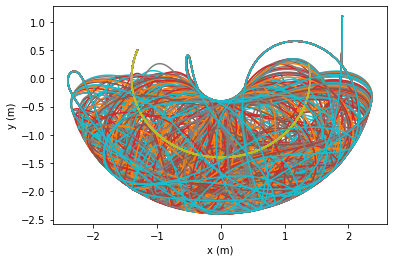

In [12]:
for i in range(N):
    plt.plot(X1i[i],Y1i[i])
    plt.plot(X2i[i],Y2i[i])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.legend()

In [13]:
#let's do slicing of the array to get desired points -- 5 fps
#print(b-a) --total time interval
n=len(t1)
fps= 5 #5 fps
m=(b-a)*fps 
n1=n//m

x1i=[]
y1i=[]
x2i=[]
y2i=[]
ti=[]
for i in range(N):
#Now,desired x,y
    x1i.append(X1i[i][::n1])
    y1i.append(Y1i[i][::n1])
    x2i.append(X2i[i][::n1])
    y2i.append(Y2i[i][::n1])
    ti.append(Ti[i][::n1])

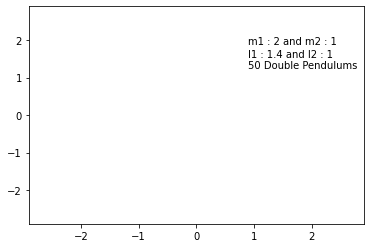

In [32]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
plt.text(l1+l2-1.5,l1+l2-1.15,'{} Double Pendulums'.format(N))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
Line1=[]
Line2=[]
Line3=[]
Line4=[]
Line5=[]

for i in range(N):
    Line1.append(ax.plot([], [], 'o-',color = '#d2eeff',markersize = 4, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k'))  # line for mass1 case 1

    Line2.append(ax.plot([], [], 'o-',color = '#ffebd8',markersize = 4, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k') )  # line for mass2 case 1

    Line3.append(ax.plot([], [], linestyle='-', linewidth=1))

    Line4.append( ax.plot([], [],  linestyle='-', linewidth=1))

    Line5.append(ax.plot([], [], 'o', color='k', markersize = 3.3))
    time_template = 'Time = %.1f s'
    time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [33]:
# animation function.  This is called sequentially
t=ti[0]
def N_animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 0             # length of motion trail of weight 1 
    trail2 = 0              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    # marker + line of first weight
    for j in range(N):
        ##############################################
        # marker + line of first weight
        Line1[j][0].set_data(x1i[j][i:max(1,i-trail1):-1], y1i[j][i:max(1,i-trail1):-1])
        #########################################################
    
    for j in range(N):
        # marker + line of the second weight 
        
        Line2[j][0].set_data(x2i[j][i:max(1,i-trail2):-1], y2i[j][i:max(1,i-trail2):-1])  
        
        #######################################################################
    for j in range(N):
        # line connecting weight 2 to weight 1
       
        Line3[j][0].set_data([x1i[j][i], x2i[j][i]], [y1i[j][i], y2i[j][i]])
        ########################################################################
    for j in range(N):
        # line connecting origin to weight 1 
       
        Line4[j][0].set_data([x1i[j][i], 0], [y1i[j][i],0]) 
        #######################################################3
    for j in range(N):
      
        Line5[j][0].set_data([0, 0], [0, 0])
    #******
    time_string.set_text(time_template % (i*dt))
    ###################################
    F=[]
    for j in range(N):
        F.append((Line3[j][0], Line4[j][0],Line5[j][0],Line1[j][0], Line2[j][0], time_string))
    f=F[0]
    return  f

In [34]:
t=ti[0]
Nt=len(t)
anim = animation.FuncAnimation(fig, N_animate, init_func=None,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#anim.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('50_pendulum_animation_final_No_trail.gif', fps=1.0/(t[2]-t[1]), writer = 'pillow')

plt.show()